<font size=5  color=#003366> **[LGBIO2050] - Medical Imaging <br><br> 
Challenge 4: Classification and mathematical morphology ** </font> <br><br><br>

<font size=5  color=#003366>
Prof. G. Kerckhofs <br>
Prof. J. Lee <br>
Prof. B. Macq <br>
Prof. F. Peeters
<br><br>
Anne-Sophie Collin (anne-sophie.collin@uclouvain.be)<br> 
Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be) <br>
<div style="text-align: right"> 2020-2021 </div>
<br><br>
</font>

<font size=4 color=#009999> **Guidelines and Deliverables ** </font> <br> <br>
   - This assignment is due on **The 25th November 2020**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=4 color=#009999> **Goals** <br></font><br>
<font size=4>
Segmentation remains one of the main problems of image analysis. It can be handled in many applications as a classification problem. For instance, let $y_i$ denote the value (or gray level) of the $i$th pixel in the image $A$. Statistically speaking, $y_i$ is drawn from a random variable $Y$ , i.e. $y_i ∼ Y$ , which represents the gray level distribution in $A$. A segmentation process could then be to find out the class $c_k$ of pixel $i$ according to $Y$ (with $k = 1...N$ classes).



<font size=4 color=#009999> **1. Bayesian classification** </font> <br>
<font size=4 color=#009999> 1.1 Expectation-Maximization (EM) algorithm </font> <br><br>
A first approach consists in building a model of the distribution of $Y$ as a mixture of simpler distributions. In this homework, we will make the assumption that each class in the image has a Gaussian distribution, and so the distribution of $Y$ will be a weighted sum of Gaussian functions. The probability to observe value $y_i$ at pixel $i$, knowing that this pixel belongs to class $k$, is :
<br>
$$p(y_i | z_i=c_k, \mu_k, \sigma_k) = \frac{1}{\sqrt{2 \pi}\sigma_k}\exp \left( -1/2 \left(\frac{y_i-\mu_k}{\sigma_k} \right)^2 \right )\qquad(1)$$
<br>
In equation (1), $z_i$ is the class of pixel $i$, and $Z$ is the class distribution in the image. Bayes’ formula uses this probability in order to find out the probability of pixel $i$ to belong to class $k$, knowing that value $y_i$ is
observed :
<br><br>
$$p(z_i = c_k | y_i, \mu_k, \sigma_k) = \frac{ p(y_i | z_i=c_k, \mu_k, \sigma_k) p(z_i=c_k) }{ \sum_{k'} p(y_i | z_i=c_{k'}, \mu_{k'}, \sigma_{k'}) p(z_i=c_{k'}) }\qquad(2)$$
<br>
In equation (2), $p(z_i = c_k)$ is the a priori probability of the $i$th pixel to belong to class $k$. In order to find out the most likely class for each pixel, we often use a ML (maximum likelihood) approach. Here, it means searching estimates of the Gaussian distribution parameters $μ_k$ and $σ_k$, denoted by $\hat{μ_k}$ and $\hat{σ_k}$. These parameters are intended to maximize a likelihood function :

$$\hat{\theta} = \arg\max_{\theta} \ell(\theta; \mathbf{y},\mathbf{z})$$

where 

$$\theta = [\mu_k,\sigma_k]_k, \qquad\mathbf{y} = [y_i]_i, \qquad\mathbf{z} = [z_i]_i$$ 

and 

$$\ell(\theta; \mathbf{y},\mathbf{z}) = \log p(\mathbf{y},\mathbf{z} | \theta) = \log \prod_{i} p(y_i,z_i| \mu_k, \sigma_k) \enspace$$

Because variable $Z$ is hidden (we are trying to estimate the class $z_i$ of each pixel $i$), we will use the EM
algorithm. This algorithm is divided in two steps :<br>
1. Step E - From an initial value of the gaussian parameters, estimate with equation (2) the probability that $z_i = c_k$ for each pixel $i$.
<br>
2. Step M - Update $\hat{\theta}$ by maximizing a modified likelihood function given by:
<br><br>
    $$\ell'(\theta; \mathbf{y}, \mathbf{z}) =  \mathrm{E}_Z\{\log(p(y | z,\theta))\}$$<br>
    $$ =  \sum_{i,k} p(z_i=c_k|y_i,\hat{\theta}) \log \left( \frac{1}{\sqrt{2 \pi} \sigma_k} \exp{\left(-\frac{1}{2} \left( \frac{y_i-\mu_k}{\sigma_k} \right)^2 \right)} \right) \enspace\qquad(3)$$    
where $p(z_i = c_k|y_i,\hat{\theta})$ have been estimated in step E.
<br> 
<br>
**Question : **
By making equal to zero derivatives with respect to $μ_k$ and $σ_k$ in the equation (3), define a way to update the $μ_k$ and $σ_k$ at each iteration in step M. How do you understand this result ? <font color=#cc3300> (Hint: at step M, the probabilities $p(z_i = c_k|y_i,\hat{\theta})$ are defined by step E and must be taken as constants in the derivative)</font> 

<font color=#C0392B> **Answer** </font> <br> How to update the $μ_k$ and $σ_k$ at each iteration in step M ?

By making equal to zero  the derivatives and taking the probabilities as constant, we obtain :

$µ_k = \sum_i \frac{p_{ik}y_i}{p_{ik}}$
$\sigma_k = \sum_i \sqrt{\frac{p_{ik}(y_i -µ_k)^2}{p_{ik}}}$



<font size=4 color=#009999> 1.2 Experiment </font> <br><br>
You will work on the following image of the brain (Brain.png). Whenever a pixel has a value 0 (background), it can be ignored by the EM algorithm.

![FIGURE 1](imgs/Brain.png "Image to segment")

**Question** : Code and apply the EM algorithm in order to segment the white matter, the gray matter and the cerebrospinal fluid. Find out a way to initialize $μ_k$ and $σ_k$. Let us consider for this purpose every a priori probability of each class equal to 1/3. Explain how you can get out an annotated image that estimates the class of each pixel by using the EM algorithm. Try with different initial parameters and discuss your results.

In [1]:
## Usefull functions cell 

from scipy.ndimage.morphology import binary_fill_holes
from scipy.stats import norm as normal
  
def getForegroundMask(originalBrainImg, backGroundValue=0):
    # Get a binary mask from a 2D array, where the pixels > 0 are set to 1
    foregroundMask = originalBrainImg > backGroundValue
    return binary_fill_holes(foregroundMask)

def getForegroundArray(originalBrainImg, foregroundMask):
    # Return a 1D array with the pixels from originalBrainImg which are under the foregroundmask
    return originalBrainImg[foregroundMask==1]
 
def plotHistogramWithDistribs(array, meansArray, stdsArray):
    # Plot the histogram of an array and gaussian distributions corresponding to meansArray / stdsArray
    plt.figure(figsize=(10, 10))
    hist, bin_edges = np.histogram(array, bins=255, normed=True)
    plt.bar(bin_edges[:-1], hist, align='center', width=0.005)
    plt.ylabel('Number of Pixels')
    plt.xlabel('Intensity')
    x = np.linspace(0, 1, 255)
    for (mean, std) in zip(meansArray, stdsArray):
        plt.plot(x, normal.pdf(x, mean, std), linewidth=1)
    

initialMeansArray [0.15 0.5  0.85]
initialStdsArray [0.1 0.1 0.1]


C:\Users\MediMonster\anaconda3\lib\site-packages\ipykernel_launcher.py:18: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


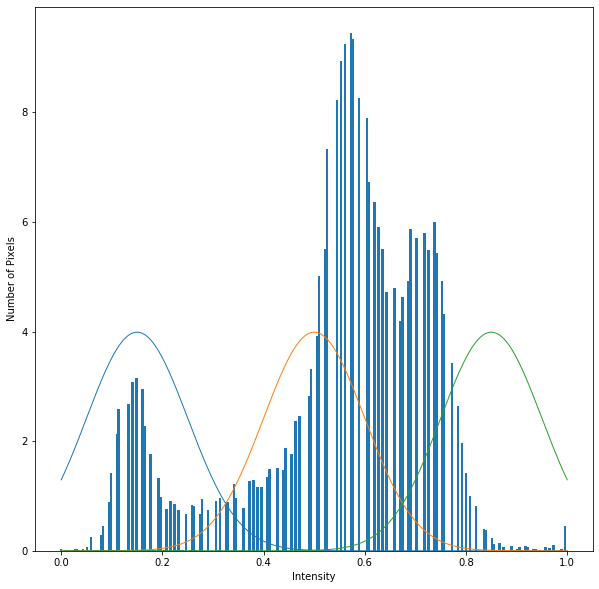

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from skimage.color import rgb2grey

## Read and rescale image between 0 and 1 
originalBrainImg = imread('imgs/Brain.png').astype(np.float64)
originalBrainImg = originalBrainImg / np.max(originalBrainImg)

## Get only non zeros pixels from the image (Use functions from previous cell)
originalBrainImg = rgb2grey(originalBrainImg)
ZeroBrainImg = getForegroundArray(originalBrainImg,getForegroundMask(originalBrainImg,0))



## Define classes for the classification
classList = ['GreyMatter', 'WhiteMatter', 'CerebrospinalFluid']
numberOfClasses = len(classList)

## Initial conditions (You can change them)
initialMeansArray = np.linspace(0.15, 0.85, numberOfClasses)
initialStdsArray = 0.1 * np.ones(numberOfClasses)
priorProbabilities = np.ones(numberOfClasses) / numberOfClasses

print('initialMeansArray', initialMeansArray)
print('initialStdsArray', initialStdsArray)
plotHistogramWithDistribs(ZeroBrainImg, initialMeansArray, initialStdsArray)

In [3]:
from IPython import display
import math as m
import random


def em(brainArray,pixelArray, meanArray, stdArray, priorProbs, tol=1e-4, max_iter=1000):
    
    ## TO COMPLETE
    
    ## ---------------------if you want to see the optimisation steps---------------------
    colorList = ['r', 'g', 'b']
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    hist, bin_edges = np.histogram(pixelArray, bins=255, normed=True)
    ax.bar(bin_edges[:-1], hist, align='center', width=0.005)
    plt.ylabel('Number of Pixels')
    plt.xlabel('Grey Levels')
    x = np.linspace(0, 1, 255)
    ## -----------------------------------------------------------------------------------
    
    meansArray = meanArray.copy()
    stdsArray = stdArray.copy()
    mean_diff = 1
    std_diff = 1
    pixel_x = brainArray.shape[0]
    pixel_y = brainArray.shape[1]

    nb_set = meansArray.shape[0]
    
    uniquePixelValues,count = np.unique(pixelArray,return_counts = True)
    #pour enlever 0
    uniquePixelValues = uniquePixelValues[1:]
    count = count[1:]
    
    pixel_diff = uniquePixelValues.shape[0]
    
    # Create empty matrix of the shape you need
    pixels_class_probs = np.zeros((pixel_diff,nb_set))
    class_prob = np.zeros((pixel_diff,nb_set))
    for i in range(nb_set):
        pixels_class_probs[:,i] = (1.0/(m.sqrt(2*m.pi)*stdsArray[i]))*np.exp(-0.5*np.square((uniquePixelValues-meansArray[i])/stdsArray[i]))

    for iterNumber in range(max_iter):
        if (mean_diff < tol and std_diff < tol):
            break
        
        print('Iteration : ', iterNumber)
        
        # Step E(xpectaction)
        for i in range(nb_set):
            class_prob[:,i] = ((pixels_class_probs[:,i])*priorProbs[i])/np.sum(pixels_class_probs*priorProbs,axis=1)    
        
        

        # Step M(aximization)
        oldMean = meansArray.copy()
        oldStd = stdsArray.copy()
        for i in range(nb_set):
            meansArray[i] = np.sum(class_prob[:,i]*count*uniquePixelValues)/np.sum(count*class_prob[:,i])
            stdsArray[i] = m.sqrt(np.sum(count*class_prob[:,i]*(uniquePixelValues-meansArray[i])**2)/np.sum(count*class_prob[:,i]))

        
        
        
        # Update prior probabilities
        for i in range(nb_set):
            pixels_class_probs[:,i] = (1.0/(m.sqrt(2*m.pi)*stdsArray[i]))*np.exp(-0.5*np.square((uniquePixelValues-meansArray[i])/stdsArray[i]))
 
        
        # Compute convergence conditions to check in next iteration
        mean_diff = max(abs(meansArray-oldMean))
        std_diff = max(abs(stdsArray-oldStd))
        
        
        
         ## ---------------------if you want to see the optimisation steps---------------------
        for elem in ax.lines:
            elem.remove()
        for i in range(meansArray.shape[0]):
            ax.plot(x, normal.pdf(x, meansArray[i], stdsArray[i]), linewidth=1, color=colorList[i])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        ##-----------------------------------------------------------------------------------
        

    
    SegmentedBrain = np.zeros((pixel_x,pixel_y))
    for i in range(pixel_diff):
        x,y = np.where(brainArray == uniquePixelValues[i])
        SegmentedBrain[x,y] = random.choices([1,2,3],weights = class_prob[i,:],k=len(x))
        
    return class_prob, meansArray, stdsArray, SegmentedBrain

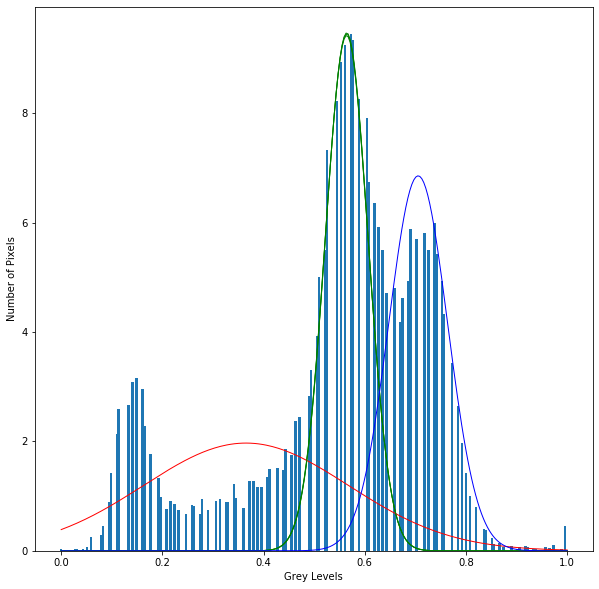

[0.36521214 0.56428889 0.7054628 ]
[0.20259646 0.04213683 0.05820439]


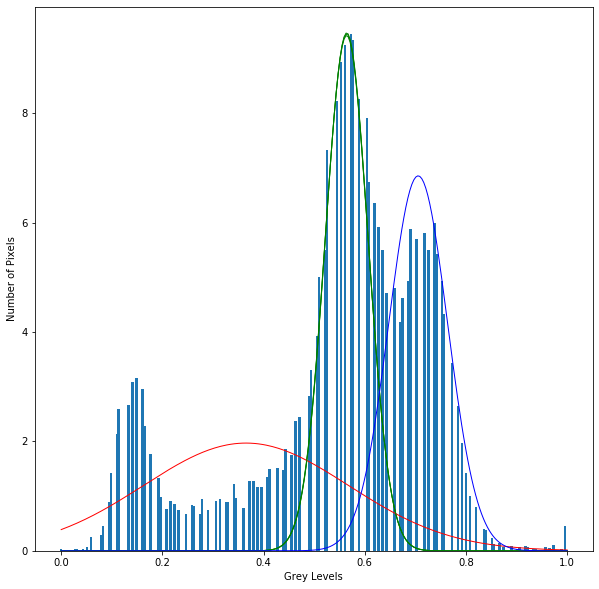

In [4]:
%matplotlib inline

class_prob, finalMeansArray, finalStdsArray,SegmentedBrain = em(originalBrainImg,
                                                 ZeroBrainImg,
                                                initialMeansArray, 
                                                initialStdsArray, 
                                                priorProbabilities, 
                                                tol=1e-3, 
                                                max_iter=100)

print(finalMeansArray)
print(finalStdsArray)

[0.36521214 0.56428889 0.7054628 ]
[0.20259646 0.04213683 0.05820439]


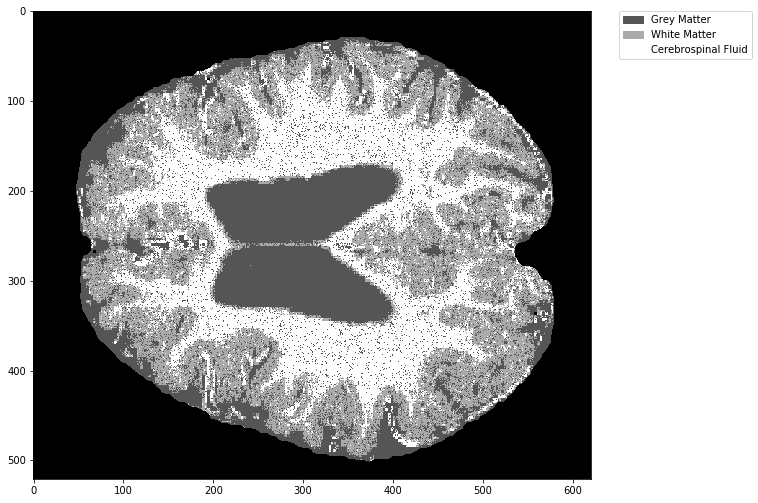

In [5]:
## Show EM segmentation results
import matplotlib.patches as mpatches

print(finalMeansArray)
print(finalStdsArray)

values = np.unique(SegmentedBrain.ravel())
values = values[1:]

plt.figure(figsize=(10,10))
im = plt.imshow(SegmentedBrain,cmap=plt.cm.gray)

# get the colors of the values, according to the 
# colormap used by imshow

colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
labels = {0:'Grey Matter',1:'White Matter',2:'Cerebrospinal Fluid'}

patches = [ mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(values))]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()



<font color=#C0392B> **Answer** </font> <br> Explain how you can get out an annotated image that estimates the class of each pixel by using the EM algorithm. Try with different initial parameters and discuss your results.

By computing the class probability for each pixel, it is possible to attribute to each pixel a class based on those probability. We will not attribute the most probable class to each pixel since it doesn't reflect the fact that some pixel are very likely to be in one class while others have very similar probabilities. We will thus make a weighted random choice between the class for each pixel where the weights are the class probabilies. Each iteration of our EM method will thus not produce the exact same annotated image. Each class will be associated to a pixel value such that we can observe graphically the class of each pixel.

We observe that the values of the initial parameters have a great influence on the results. If we choose value for the means and the standard deviation that are far away from the true values (for example 1 for std and (0.15,0.225,0.3) for the means, the EM algorithm doesn't converge well and our results are totally different. It is thus important to not choose completly random initial values. 

<font size=4 color=#009999>** 2. Mathematical Morphology** <br></font><br>
Segmentation is often used to define the contour of organs. However, this requires to have rather smooth and simple masks, which is barely the case with EM or KNN methods, as no spatial criterion is used during classification.

**Question :** In this exercise, we ask you to refine the segmentation of the white matter computed with the EM or kNN method, by removing outliers in homogeneous regions in the mask (small holes and peaks). Show that mathematical morphology operators can solve this problem by using different structuring elements.

In [6]:
## Get the mask for the white matter only and refine the segmentation using mathematical morphology
## (scipy.ndimage.morphology)

from scipy.ndimage import morphology
import copy

whiteBrain = copy.deepcopy(SegmentedBrain)

for i in range(SegmentedBrain.shape[0]):
    for j in range(SegmentedBrain.shape[1]):
        if SegmentedBrain[i,j] != 2:
            whiteBrain[i,j] = 0
            
#Lets refine the segmentation

new_morpho = morphology.binary_closing(whiteBrain)
new_morpho2 = morphology.binary_opening(new_morpho)


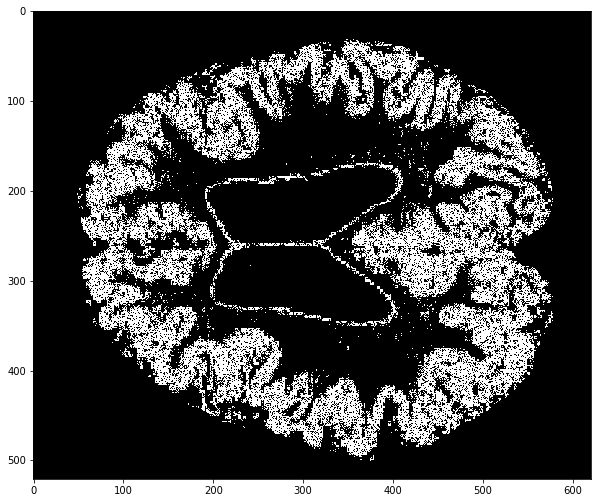

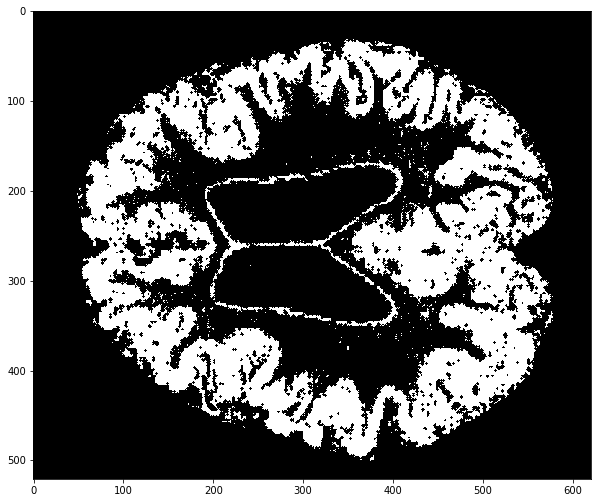

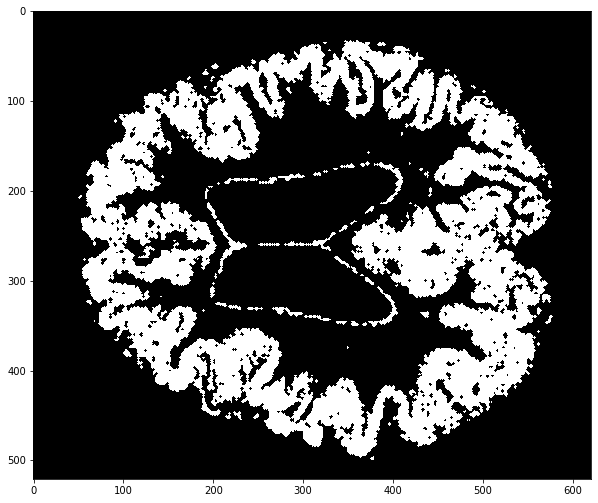

In [7]:
## Show results
#The white matter in the brain without mathematical morphology  
plt.figure(figsize=(10,10))
white = plt.imshow(whiteBrain,cmap=plt.cm.gray)

plt.show()


#The white matter in the brain with mathematical morphology  
plt.figure(figsize=(10,10))
white_ref = plt.imshow(new_morpho,cmap=plt.cm.gray)

plt.show()

plt.figure(figsize=(10,10))
white_ref = plt.imshow(new_morpho2,cmap=plt.cm.gray)

plt.show()

<font color=#C0392B> **Answer** </font> <br> Discuss your results.

In fact, mathematic morphology is a a theory and technique for the analysis and processing of geometrical structures, 
based on set theory, lattice theory, topology, and random functions. [1] Here, the goal is to remove the small holes that we
obtained after our segmentation. Four basic morphological operators exist : erosion, dilation, opening and closing. In our situation,
we decided to use the closing operator because it removes small holes by filling them. A better application of mathematical morphology,
would be to combine opening and closing to remove all the noise. We see that this application works by having a refined segmentation with an images with less holes.


[1]Mathematical morphology ,https://en.wikipedia.org/wiki/Mathematical_morphology#:~:text=Mathematical%20morphology%20(MM)%20is%20a,%2C%20topology%2C%20and%20random%20functions.